Idea de Negocio: ¿Cómo podemos predecir de manera precisa y eficiente el tipo de vehículo asegurado (automóvil, motocicleta, etc.) basándonos en características clave del vehículo, como peso, potencia, cilindraje, capacidad de pasajeros, número de puertas y tipo de transmisión?

Predecir el tipo de vehículo asegurado basándose en características clave del vehículo puede ser extremadamente útil para una empresa aseguradora en varios aspectos:
Evaluación de Riesgos: Al comprender qué tipo de vehículos asegura con mayor frecuencia, la empresa puede evaluar mejor los riesgos asociados con cada tipo de vehículo y establecer primas de seguros apropiadas y Personalización de Pólizas

# **ML Aprendizaje supervisado - Clasificación**

# **Carga Inicial**

In [ ]:
!pip install phik

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


In [ ]:
path = "/content/drive/My Drive/Dataset/VehiculosColombia(Fasecolda)2017.csv"
Registros = pd.read_csv(path)

Registros

,Novedad,Marca,Clase,Codigo,HomologoCodigo,Referencia1,Referencia2,Referencia3,Peso,IdServicio,...,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Estado,Combustible,Transmision,Um,PesoCategoria
0,M,ALEKO,AUTOMOVIL,101001,NaN,2141,1.6,MT 1600CC TAXI,1380,2,...,5,0,5,0,2,Activo,GSL,4X2,0,1
1,M,AMERICAN MOTOR,CAMIONETA PASAJ.,206001,NaN,EAGLE,SUMMIT,AT 2400CC LX 4P,0,1,...,5,0,5,0,2,Activo,NaN,NaN,0,1
2,M,AMERICAN MOTOR,CAMPERO,208003,NaN,WRANGLER,4.2,MT 4200CC CAB,1100,1,...,5,0,3,1,2,Activo,NaN,4X4,0,1
3,M,AMERICAN MOTOR,CAMPERO,208004,NaN,WRANGLER,4.2,MT 2500CC CARPADO,1100,1,...,5,0,3,1,2,Activo,NaN,4X4,0,1
4,M,AUTECO,MOTOCICLETA,317003,NaN,SUMA,80,MT 80CC 2T,75,1,...,2,0,0,0,2,Activo,GSL,2X1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12428,N,STÄRKER,MOTOCICLETA,40017004,NaN,SUNNY,1200 W,ELEC,98,1,...,2,0,0,0,2,Activo,ELT,2X1,0,1
12429,N,SCOMADI,MOTOCICLETA,40117001,NaN,TURISMO LEGGERA,125,AT 125,100,1,...,2,0,0,0,2,Activo,GSL,2X1,0,1
12430,N,HAOJUE,MOTOCICLETA,40217001,NaN,LUCKY SPORTS,HJ 110-3,AT 110CC,107,1,...,2,0,0,0,2,Activo,GSL,2X1,0,1
12431,N,HAOJUE,MOTOCICLETA,40217002,NaN,COOL,HJ 150-9,MT 150CC,138,1,...,2,0,0,0,2,Activo,GSL,2X1,0,1


# **Data Cleaning**

In [ ]:
subDF=Registros[['Marca','Referencia1','Referencia3','Clase','Servicio','Nacionalidad','CapacidadPasajeros','Puertas','AireAcondicionado','Peso','Transmision','Potencia','Cilindraje', 'Combustible','Novedad']]
subDF

,Marca,Referencia1,Referencia3,Clase,Servicio,Nacionalidad,CapacidadPasajeros,Puertas,AireAcondicionado,Peso,Transmision,Potencia,Cilindraje,Combustible,Novedad
0,ALEKO,2141,MT 1600CC TAXI,AUTOMOVIL,Publico,RUS,5,5,0,1380,4X2,82,1570,GSL,M
1,AMERICAN MOTOR,EAGLE,AT 2400CC LX 4P,CAMIONETA PASAJ.,Particular,NaN,5,5,0,0,NaN,0,2351,NaN,M
2,AMERICAN MOTOR,WRANGLER,MT 4200CC CAB,CAMPERO,Particular,USA,5,3,1,1100,4X4,120,2400,NaN,M
3,AMERICAN MOTOR,WRANGLER,MT 2500CC CARPADO,CAMPERO,Particular,USA,5,3,1,1100,4X4,120,2400,NaN,M
4,AUTECO,SUMA,MT 80CC 2T,MOTOCICLETA,Particular,COL,2,0,0,75,2X1,6,80,GSL,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12428,STÄRKER,SUNNY,ELEC,MOTOCICLETA,Particular,CHI,2,0,0,98,2X1,2,0,ELT,N
12429,SCOMADI,TURISMO LEGGERA,AT 125,MOTOCICLETA,Particular,ENG,2,0,0,100,2X1,9,125,GSL,N
12430,HAOJUE,LUCKY SPORTS,AT 110CC,MOTOCICLETA,Particular,CHI,2,0,0,107,2X1,7,107,GSL,N
12431,HAOJUE,COOL,MT 150CC,MOTOCICLETA,Particular,CHI,2,0,0,138,2X1,11,149,GSL,N


In [ ]:
# Eliminar el cilindraje de la columna 'Referencia3' utilizando Pandas
subDF['Referencia3'] = subDF['Referencia3'].str.replace(r'\b\d+CC\b', '', regex=True)


<ipython-input-135-1e30175c666f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subDF['Referencia3'] = subDF['Referencia3'].str.replace(r'\b\d+CC\b', '', regex=True)


In [ ]:
subDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12433 entries, 0 to 12432
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Marca               12433 non-null  object
 1   Referencia1         12433 non-null  object
 2   Referencia3         12433 non-null  object
 3   Clase               12433 non-null  object
 4   Servicio            12433 non-null  object
 5   Nacionalidad        12357 non-null  object
 6   CapacidadPasajeros  12433 non-null  int64 
 7   Puertas             12433 non-null  int64 
 8   AireAcondicionado   12433 non-null  int64 
 9   Peso                12433 non-null  int64 
 10  Transmision         11733 non-null  object
 11  Potencia            12433 non-null  int64 
 12  Cilindraje          12433 non-null  int64 
 13  Combustible         11707 non-null  object
 14  Novedad             12433 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.4+ MB


In [ ]:
# Identificar valores faltantes en el conjunto de datos
Faltantes = subDF.isnull().sum()
print("Valores faltantes por columna:\n", Faltantes)

# Identificar cuantos valores duplicados hay
num_duplicates = subDF.duplicated().sum()
print("Número de datos duplicados:", num_duplicates)

Valores faltantes por columna:
 Marca                   0
Referencia1             0
Referencia3             0
Clase                   0
Servicio                0
Nacionalidad           76
CapacidadPasajeros      0
Puertas                 0
AireAcondicionado       0
Peso                    0
Transmision           700
Potencia                0
Cilindraje              0
Combustible           726
Novedad                 0
dtype: int64
Número de datos duplicados: 746


**`Valores Faltantes`**

In [ ]:
#Rellenar valores utilizando la moda (para variables categóricas)

# Combustible
moda = subDF['Combustible'].mode()[0]
subDF['Combustible'].fillna(moda, inplace=True)

# Transmision
moda1 = subDF['Transmision'].mode()[0]
subDF['Transmision'].fillna(moda1, inplace=True)

#Rellenar valores utilizando la media (para variable cuantitativas)

# Puertas
media = subDF['Puertas'].mean()
subDF['Puertas'].fillna(media, inplace=True)

# Cilindraje
media1 = subDF['Cilindraje'].mean()
subDF['Cilindraje'].fillna(media1, inplace=True)

# Potencia
media2 = subDF['Potencia'].mean()
subDF['Potencia'].fillna(media2, inplace=True)

# Eliminar filas con valores NaN en la columna "Nacionalidad"
subDF = subDF.dropna(subset=['Nacionalidad'])
subDF= subDF[subDF['Peso'] != 0]

# Eliminar Clase erronea
subDF = subDF[subDF['Clase'] != 'CHASIS']

<ipython-input-138-24741853a9ab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subDF['Combustible'].fillna(moda, inplace=True)
<ipython-input-138-24741853a9ab>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subDF['Transmision'].fillna(moda1, inplace=True)
<ipython-input-138-24741853a9ab>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subDF['Puertas'].fillna(media, inplace=True)
<ipython-input-138-24741853a9ab>:19: SettingWithCo

In [ ]:
# Verificar si quedan valores faltantes después de la imputación o eliminación
Faltantesdespues = subDF.isnull().sum()
print("Valores faltantes restantes:\n", Faltantesdespues)

Valores faltantes restantes:
 Marca                 0
Referencia1           0
Referencia3           0
Clase                 0
Servicio              0
Nacionalidad          0
CapacidadPasajeros    0
Puertas               0
AireAcondicionado     0
Peso                  0
Transmision           0
Potencia              0
Cilindraje            0
Combustible           0
Novedad               0
dtype: int64


**`MANEJO DE OUTLIERS`**

In [ ]:
# Estadísticas descriptivas
print(subDF[['Peso', 'CapacidadPasajeros', 'Puertas']].describe())


               Peso  CapacidadPasajeros       Puertas
count  10083.000000        10083.000000  10083.000000
mean    1976.723495            4.542497      2.993554
std     2067.991821            4.490424      1.821987
min       38.000000            0.000000      0.000000
25%     1065.000000            2.000000      2.000000
50%     1456.000000            5.000000      4.000000
75%     2060.000000            5.000000      5.000000
max    41000.000000           55.000000      6.000000


In [ ]:
# Calcular los límites superiores para los valores atípicos en Peso
cuartilpeso = subDF['Peso'].quantile(0.75)
RangoIntercuartilPeso = subDF['Peso'].quantile(0.75) - subDF['Peso'].quantile(0.25)
LimiteSuperiorPeso = cuartilpeso + 1.5 * RangoIntercuartilPeso

# Calcular los límites superiores para los valores atípicos en Capacidad de Pasajeros
cuartilcapacidad = subDF['CapacidadPasajeros'].quantile(0.75)
RangoIntercuartilCapacidad = subDF['CapacidadPasajeros'].quantile(0.75) - subDF['CapacidadPasajeros'].quantile(0.25)
LimiteSuperiorCapacidad = cuartilcapacidad + 1.5 * RangoIntercuartilCapacidad

# Filtrar los valores atípicos
subDF = subDF[(subDF['Peso'] <= LimiteSuperiorPeso) & (subDF['CapacidadPasajeros'] <= LimiteSuperiorCapacidad)]

# Imprimir estadísticas descriptivas después de filtrar valores atípicos
print("Estadísticas después de eliminar valores atípicos:")
print(subDF[['Peso', 'CapacidadPasajeros']].describe())

Estadísticas después de eliminar valores atípicos:
              Peso  CapacidadPasajeros
count  8635.000000         8635.000000
mean   1323.779386            4.128662
std     710.716991            1.600326
min      38.000000            0.000000
25%     985.000000            2.000000
50%    1347.000000            5.000000
75%    1750.000000            5.000000
max    3500.000000            9.000000


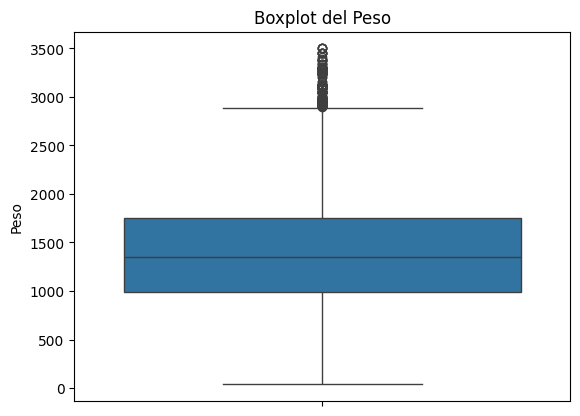

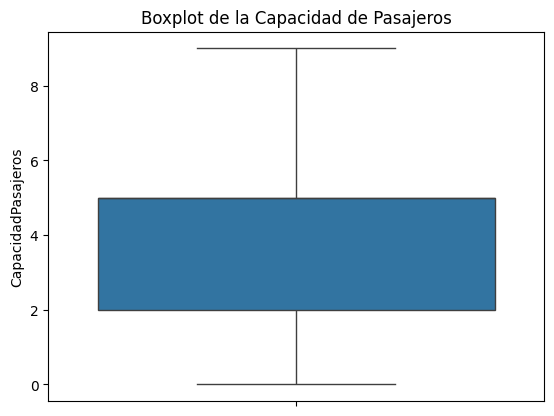

In [ ]:
# Boxplot para Peso
sns.boxplot(data=subDF, y='Peso')
plt.title('Boxplot del Peso')
plt.show()

# Boxplot para Capacidad de Pasajeros
sns.boxplot(data=subDF, y='CapacidadPasajeros')
plt.title('Boxplot de la Capacidad de Pasajeros')
plt.show()

**`Graficos`**

<Figure size 1200x800 with 0 Axes>

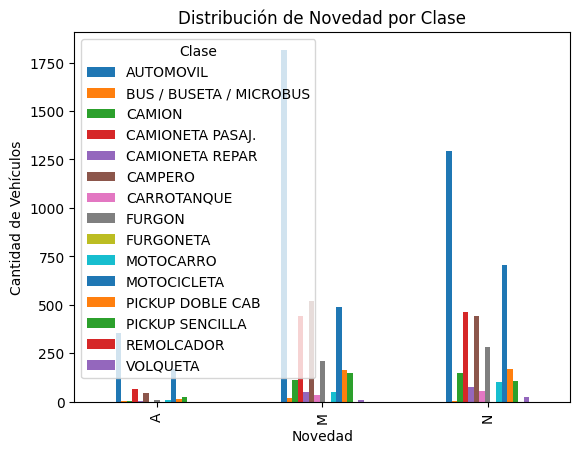

<Figure size 1200x800 with 0 Axes>

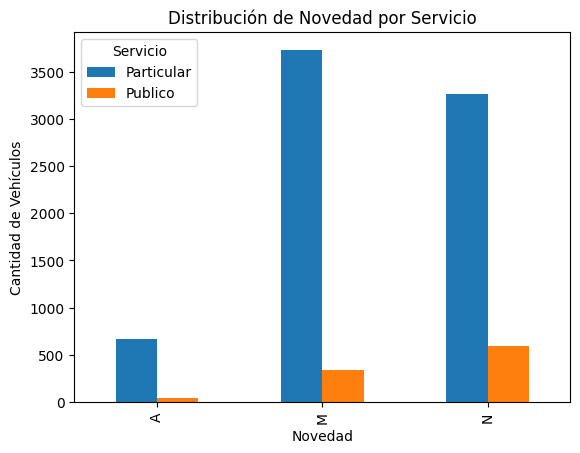

In [ ]:
# Graficar la distribución de Novedad por Clase
plt.figure(figsize=(12, 8))
estado_clase = subDF.groupby(['Novedad', 'Clase']).size().unstack()
estado_clase.plot(kind='bar', stacked=False)
plt.title('Distribución de Novedad por Clase')
plt.xlabel('Novedad')
plt.ylabel('Cantidad de Vehículos')
plt.legend(title='Clase')


# Graficar la distribución de Novedad por Servicio
plt.figure(figsize=(12, 8))
estado_servicio = subDF.groupby(['Novedad', 'Servicio']).size().unstack()
estado_servicio.plot(kind='bar', stacked=False)
plt.title('Distribución de Novedad por Servicio')
plt.xlabel('Novedad')
plt.ylabel('Cantidad de Vehículos')
plt.legend(title='Servicio')


plt.show()

In [ ]:
subDF = subDF[(subDF['Clase'] != 'FURGONETA') & (subDF['Clase'] != 'REMOLCADOR')]


# **Analisis de Datos**

In [ ]:
subDF.sample(5)

,Marca,Referencia1,Referencia3,Clase,Servicio,Nacionalidad,CapacidadPasajeros,Puertas,AireAcondicionado,Peso,Transmision,Potencia,Cilindraje,Combustible,Novedad
7308,PORSCHE,CAYENNE [2],TP V8,CAMIONETA PASAJ.,Particular,ALE,5,5,1,2356,4X4,405,4806,GSL,M
52,AUTECO,BAJAJ,MT,MOTOCICLETA,Particular,COL,2,0,0,122,2X1,13,135,GSL,N
12338,BAIC,KENBO,MT,CAMIONETA PASAJ.,Particular,CHI,7,5,1,1271,4X2,111,1500,GSL,N
10732,QINGQI,QM,MT,MOTOCICLETA,Particular,CHI,2,0,0,100,2X1,9,106,GSL,N
6036,MERCEDES BENZ,ML 550,TP V8 T,CAMPERO,Particular,ALE,5,5,1,2260,4X4,402,4663,GSL,N


In [ ]:
subDF['Clase'].value_counts()

Clase
AUTOMOVIL                  3460
MOTOCICLETA                1366
CAMPERO                    1006
CAMIONETA PASAJ.            969
FURGON                      504
PICKUP DOBLE CAB            346
PICKUP SENCILLA             278
CAMION                      261
MOTOCARRO                   161
CAMIONETA REPAR             129
CARROTANQUE                  91
VOLQUETA                     33
BUS / BUSETA / MICROBUS      29
Name: count, dtype: int64

In [ ]:
clasesLabel = np.unique(subDF['Clase'].values)

In [ ]:
ColumnasX=['CapacidadPasajeros', 'Puertas',  'Peso', 'Transmision', 'Potencia', 'Cilindraje', 'Combustible']

([<matplotlib.patches.Wedge at 0x7b17f6cbf100>,
 [Text(0.337328850094891, 1.0470001179052746, 'AUTOMOVIL'),
  Text(-1.0912416883742988, 0.13853366938766157, 'CAMPERO'),
  Text(-0.814605002553682, -0.7392013865074362, 'MOTOCICLETA'),
  Text(-0.1264135323506222, -1.0927120475398073, 'MOTOCARRO'),
  Text(0.4493964456727062, -1.004013363764018, 'PICKUP DOBLE CAB'),
  Text(0.7337005859481938, -0.8195629629133306, 'CAMIONETA PASAJ.'),
  Text(0.8993739748661244, -0.6333454454983536, 'CAMIONETA REPAR'),
  Text(1.005561067543684, -0.4459225711268798, 'PICKUP SENCILLA'),
  Text(1.0619377937589916, -0.28685906328070837, 'BUS / BUSETA / MICROBUS'),
  Text(1.0862466112309976, -0.17340213259696124, 'CAMION'),
  Text(1.096634938643594, -0.08597564391245328, 'CARROTANQUE'),
  Text(1.0993969144482885, -0.03642011122419719, 'FURGON'),
  Text(1.0999387478765983, -0.011608226378783932, 'VOLQUETA')],
 [Text(0.18399755459721326, 0.571090973402877, '40.08%'),
  Text(-0.5952227391132539, 0.07556381966599722, 

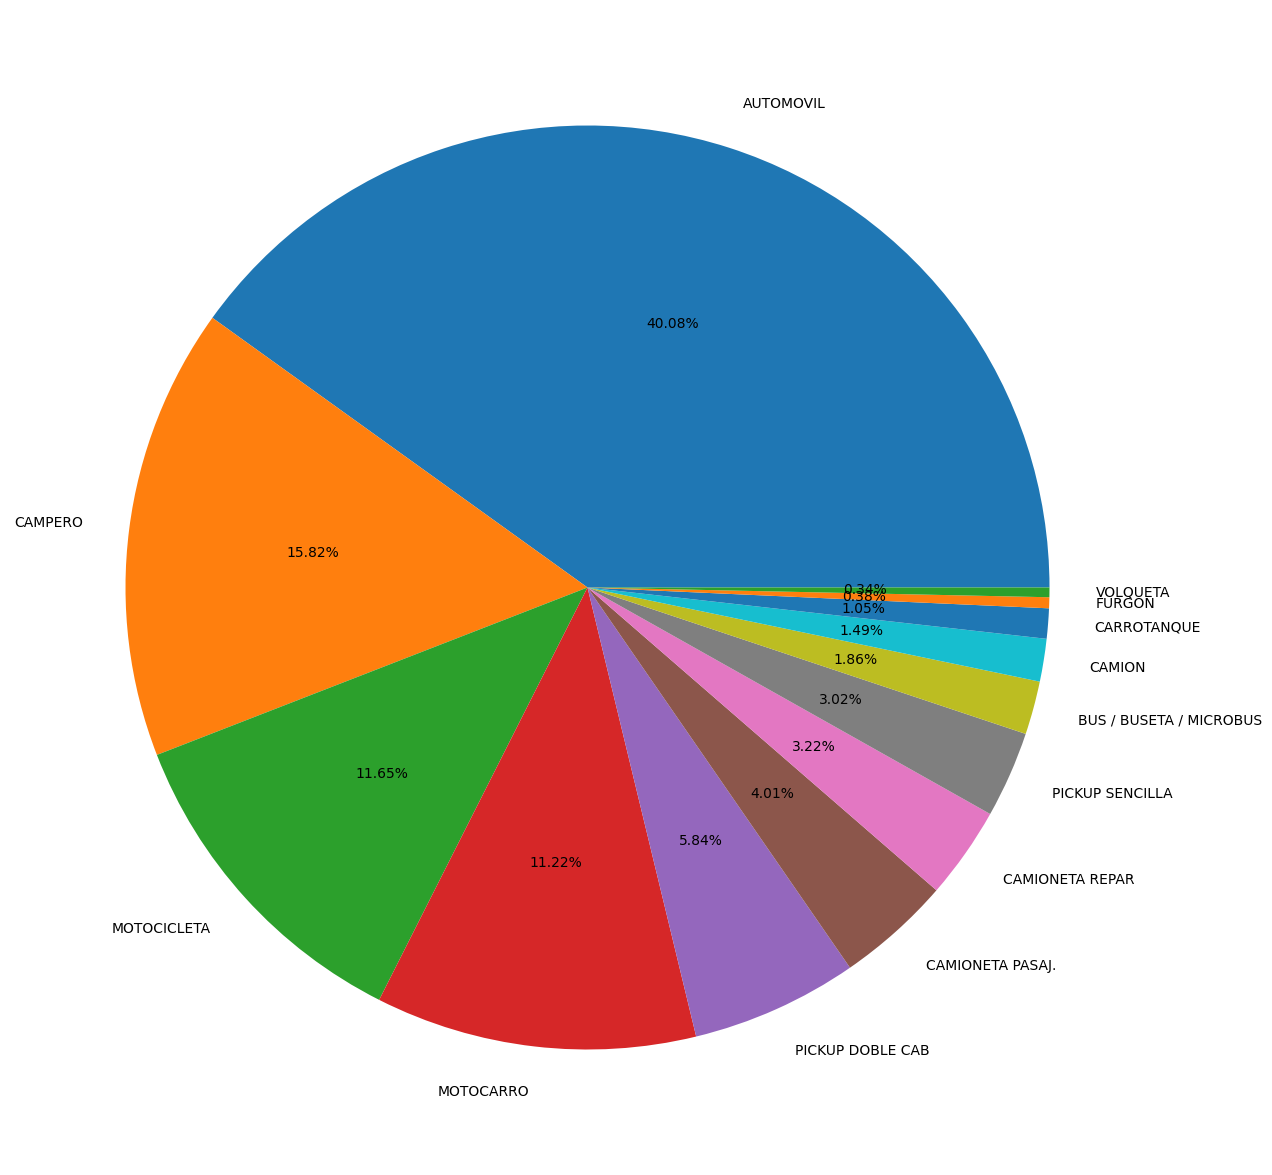

In [ ]:
plt.figure(figsize=(15, 15))
plt.pie(subDF['Clase'].value_counts(),labels= subDF['Clase'].unique(), autopct='%.2f%%')

In [ ]:
import phik
from phik import  resources
from phik.binning import bin_data
from phik.decorators import *
from phik.report import plot_correlation_matrix
from sklearn.preprocessing import LabelEncoder
import networkx as nx

In [ ]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Obtener las columnas categóricas
categorical_columns = subDF.select_dtypes(include=['object'])

# Convertir las columnas categóricas a valores numéricos
for column in categorical_columns:
    subDF[column] = label_encoder.fit_transform(subDF[column])

In [ ]:
subDF.sample(5)

,Marca,Referencia1,Referencia3,Clase,Servicio,Nacionalidad,CapacidadPasajeros,Puertas,AireAcondicionado,Peso,Transmision,Potencia,Cilindraje,Combustible,Novedad
118,14,269,545,0,0,3,5,5,1,1120,3,102,1595,2,1
2333,52,1165,688,9,0,16,2,0,0,181,0,111,937,2,2
9706,108,937,4,9,0,24,2,0,0,107,0,11,150,2,2
10998,71,2229,470,10,0,5,5,4,1,1740,3,100,2771,0,1
2363,58,1632,377,0,0,26,5,4,0,1200,3,68,1300,2,1


interval columns not set, guessing: ['Marca', 'Referencia1', 'Referencia3', 'Clase', 'Servicio', 'Nacionalidad', 'CapacidadPasajeros', 'Puertas', 'AireAcondicionado', 'Peso', 'Transmision', 'Potencia', 'Cilindraje', 'Combustible', 'Novedad']


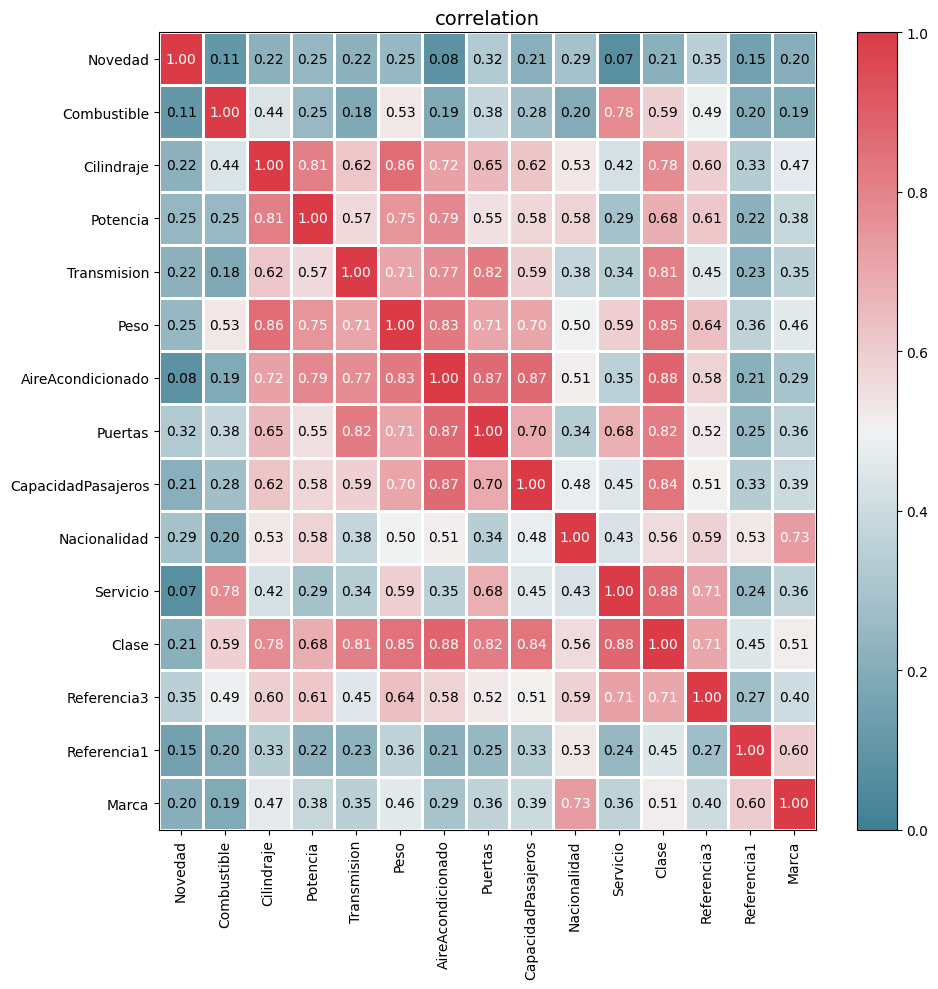

In [ ]:
correc_mat = subDF.phik_matrix()
cma = sns.diverging_palette(220, 10, as_cmap= True)

plot_correlation_matrix(correc_mat.values, x_labels=correc_mat.columns, y_labels=correc_mat.index, vmin = 0, vmax = 1, color_map=cma, figsize=(10,10))

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X = subDF[['CapacidadPasajeros', 'Puertas',  'Peso', 'Transmision', 'Potencia', 'Cilindraje', 'Combustible']].values
Y = subDF['Clase'].values

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size= 0.1, random_state= 5, stratify= Y)

X_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size= 0.1, random_state= 5, stratify= y_train)

# **Random Forest**

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=1)

# Entrenar el clasificador con los datos de entrenamiento
rf_classifier.fit(X_train, y_train)

# Hacer predicciones en el conjunto de Entrenamiento
y_pred = rf_classifier.predict(X_train)

# Hacer predicciones en el conjunto de prueba
y_test_pred = rf_classifier.predict(x_test)

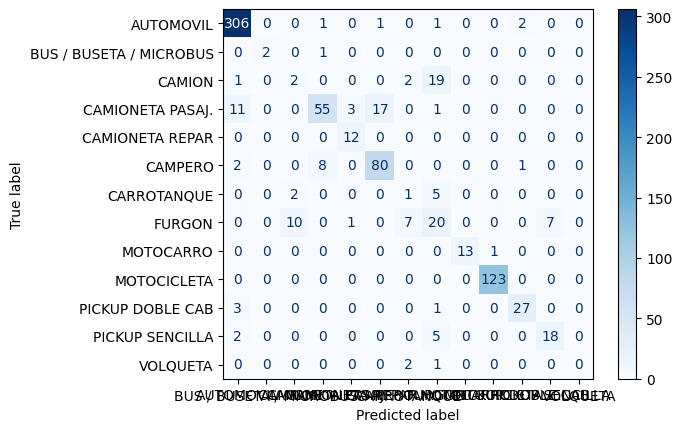

In [ ]:
mc = confusion_matrix(y_test,y_test_pred)

# Crear la visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=mc, display_labels=clasesLabel)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
# Calcular la precisión en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Precisión en el conjunto de Prueba:", accuracy_test)

# Calcular la precisión en el conjunto de Entrenamiento
accuracy = accuracy_score(y_train, y_pred)
print("Precisión del modelo Random Forest:", accuracy)

Precisión en el conjunto de Prueba: 0.8481338481338482
Precisión del modelo Random Forest: 0.9397883295194508


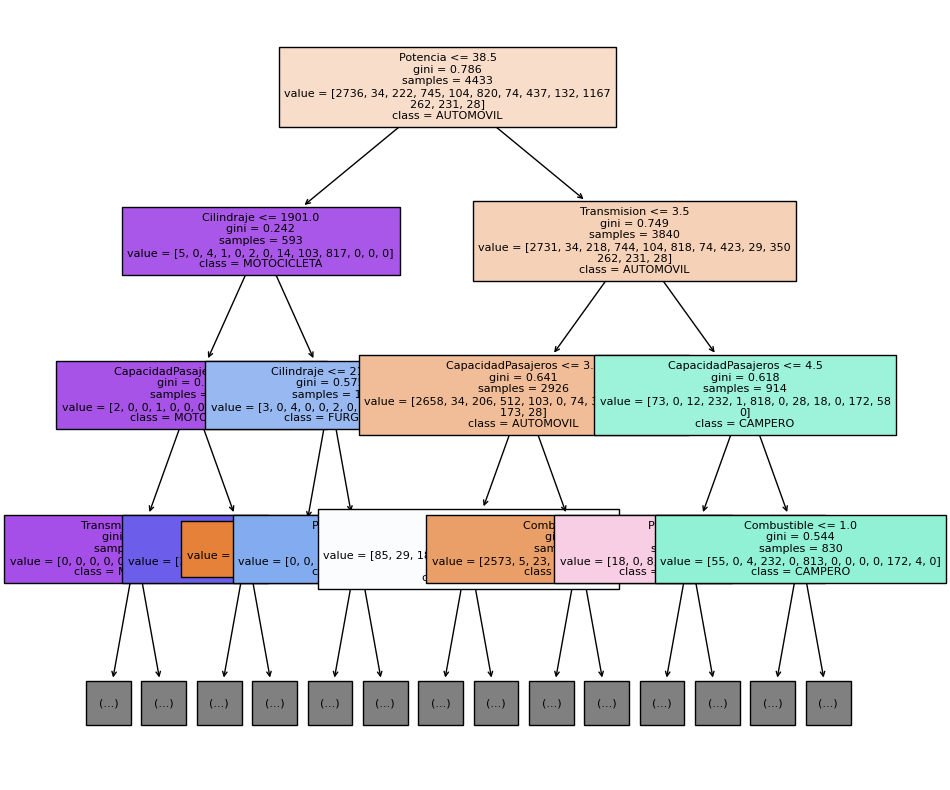

In [ ]:
# Visualizar el primer árbol del Random Forest con una profundidad limitada
plt.figure(figsize=(10, 10))
plot_tree(rf_classifier.estimators_[0], feature_names=ColumnasX, class_names=clasesLabel, filled=True, fontsize=8, max_depth=3)
plt.show()

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 2, metric= 'manhattan',weights='uniform')

knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

In [ ]:
train_acc = knn.score(X_train, y_train)
test_acc = knn.score(x_test,y_test)

print(train_acc)

print(test_acc)

0.8642734553775744
0.731016731016731


In [ ]:
y_pred = knn.predict(x_test)

mc = confusion_matrix(y_test,y_pred)

print(mc)

pd.crosstab(y_test, y_pred, rownames=['True0'],colnames=['Predicciones'],margins=True)

[[297   0   0   7   0   5   0   1   0   0   0   1   0]
 [  0   1   1   1   0   0   0   0   0   0   0   0   0]
 [  0   0   6   0   1   1   4  12   0   0   0   0   0]
 [ 29   0   0  44   2  10   0   0   0   0   2   0   0]
 [  2   0   0   5   5   0   0   0   0   0   0   0   0]
 [ 14   0   1  24   1  50   0   0   0   0   0   1   0]
 [  0   0   5   0   0   0   0   3   0   0   0   0   0]
 [  2   0  24   1   0   2   3  11   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0  13   1   0   0   0]
 [  0   0   0   0   0   0   0   0   5 118   0   0   0]
 [  4   0   1   6   0   5   0   1   0   0  12   2   0]
 [  4   0   0   3   0   1   0   6   0   0   0  11   0]
 [  0   0   1   0   0   0   1   1   0   0   0   0   0]]


Predicciones,0,1,2,3,4,5,6,7,8,9,10,11,All
True0,,,,,,,,,,,,,
0,297,0,0,7,0,5,0,1,0,0,0,1,311
1,0,1,1,1,0,0,0,0,0,0,0,0,3
2,0,0,6,0,1,1,4,12,0,0,0,0,24
3,29,0,0,44,2,10,0,0,0,0,2,0,87
4,2,0,0,5,5,0,0,0,0,0,0,0,12
5,14,0,1,24,1,50,0,0,0,0,0,1,91
6,0,0,5,0,0,0,0,3,0,0,0,0,8
7,2,0,24,1,0,2,3,11,0,0,1,1,45
8,0,0,0,0,0,0,0,0,13,1,0,0,14


In [ ]:
y_train_pred = knn.predict(X)
print(classification_report(Y,y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3460
           1       0.79      0.79      0.79        29
           2       0.37      0.72      0.49       261
           3       0.71      0.75      0.73       969
           4       0.75      0.48      0.58       129
           5       0.89      0.72      0.80      1006
           6       0.25      0.27      0.26        91
           7       0.58      0.39      0.47       504
           8       0.89      0.96      0.92       161
           9       1.00      0.98      0.99      1366
          10       0.91      0.70      0.79       346
          11       0.89      0.46      0.61       278
          12       0.00      0.00      0.00        33

    accuracy                           0.84      8633
   macro avg       0.69      0.63      0.64      8633
weighted avg       0.85      0.84      0.83      8633



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Naive Bayes Gaussiano**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

bn = GaussianNB()

In [ ]:
bn.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred1 = bn.predict(x_test)

In [ ]:
mc1 = confusion_matrix(y_test,y_pred1)
print(mc1)

[[279   0   0   3   0   6   0   0   0   0  11  12   0]
 [  0   0   1   1   0   0   0   0   0   0   0   0   1]
 [  0   0   1   0   0   0   0   2   0   0   2   0  19]
 [ 38   0   0  20   2  27   0   0   0   0   0   0   0]
 [  0   1   0   0  11   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  91   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   8]
 [  0   0   3   0   1   0   1   6   1   0   3   8  22]
 [  0   0   0   0   0   0   0   0  11   2   0   1   0]
 [  0   0   0   0   0   0   0   0   3 120   0   0   0]
 [  3   0   0   0   0  10   0   0   0   0  18   0   0]
 [  1   0   0   0   0   0   0   3   0   0   0  21   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   2]]


In [ ]:
print(f"El accuracy del model NB es: {metrics.accuracy_score(y_pred1,y_test)}")

El accuracy del model NB es: 0.7464607464607464


# **Mejores Hiperparametros**

In [ ]:
from sklearn.model_selection import GridSearchCV


**KNN**

In [ ]:
grid_s = GridSearchCV(estimator=knn, param_grid={'n_neighbors':[3,4,5,9,10],'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'] , 'weights':['uniform','distance']})

grid_s.fit(X_val,y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(metric='manhattan', n_neighbors=2),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'chebyshev'],
                         'n_neighbors': [3, 4, 5, 9, 10],
                         'weights': ['uniform', 'distance']})

In [ ]:
print(f"Hiper parametros ideales KNN: {grid_s.best_params_}")

Hiper parametros ideales KNN: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


**Random Forest**

In [ ]:
grid_search1 = GridSearchCV(estimator=rf_classifier, param_grid={'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]})

grid_search1.fit(X_val, y_val)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(max_depth=20, min_samples_split=5,
                                              n_estimators=200),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
# Obtener los mejores hiperparámetros encontrados
best_params = grid_search1.best_params_
print("Hiper parametros ideales Random Forest:", best_params)

Hiper parametros ideales Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


# **Modelos con Hiperparametros Recomendados**

**Random Forest**

In [ ]:
rf_classifier1 = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=2, min_samples_leaf=1)

# Entrenar el clasificador con los datos de entrenamiento
rf_classifier1.fit(X_train, y_train)

# Hacer predicciones en el conjunto de Entrenamiento
y_pred = rf_classifier1.predict(X_train)

# Hacer predicciones en el conjunto de prueba
y_test_pred = rf_classifier1.predict(x_test)

In [ ]:
# Calcular la precisión en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Precisión en el conjunto de Prueba:", accuracy_test)

# Calcular la precisión en el conjunto de Entrenamiento
accuracy = accuracy_score(y_train, y_pred)
print("Precisión del modelo Random Forest:", accuracy)

Precisión en el conjunto de Prueba: 0.8545688545688546
Precisión del modelo Random Forest: 0.9516590389016019


**KNN**

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors= 10, metric= 'manhattan',weights='distance')
knn1.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')

In [ ]:
train_acc = knn1.score(X_train, y_train)
test_acc = knn1.score(x_test,y_test)

print("Precisión del modelo con datos de entrenamiento:",train_acc)

print("Precisión del modelo con datos de prueba:",test_acc)

Precisión del modelo con datos de entrenamiento: 0.9526601830663616
Precisión del modelo con datos de prueba: 0.7644787644787645


# **Conclusion**



*   En la clase Furgoneta, Volqueta y Remolcador al presentar la cuenta de registros con esas clases se puede ovservar que cuentan con menos de 35 registros unas incluso teniendo un unico registro esto indica que no se cuenta con suficientes registros para tener una buena prediccion.
*   Furgoneta y Remolcador son excluidos del dataframe ya que solo cuentan con un registro.
*  Se tiene una buena presicion del modelo, pero si se quiere tener en cuenta las clases excluidas se requiere recopilar mas datos de esas clases.

*   El Modelo con mas presicion fue random forest con sus datos de prueba y entrenamiento.
*   Despues de cambiar los hiperparametros con los recomendados se tuvo una mejora en datos de pruebas en RANDOM FOREST del 0.7586% en datos de entrenamiento hubo una mejora del 1.2628% , para KNN se tuvo una mejora del    10.2209% en datos de entrenamiento y en datos de prueba del 4.5721%.





